In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
data = pd.read_csv("data/pima-data.csv", delimiter=',')
data.head(2)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False


In [29]:
data.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

<Axes: >

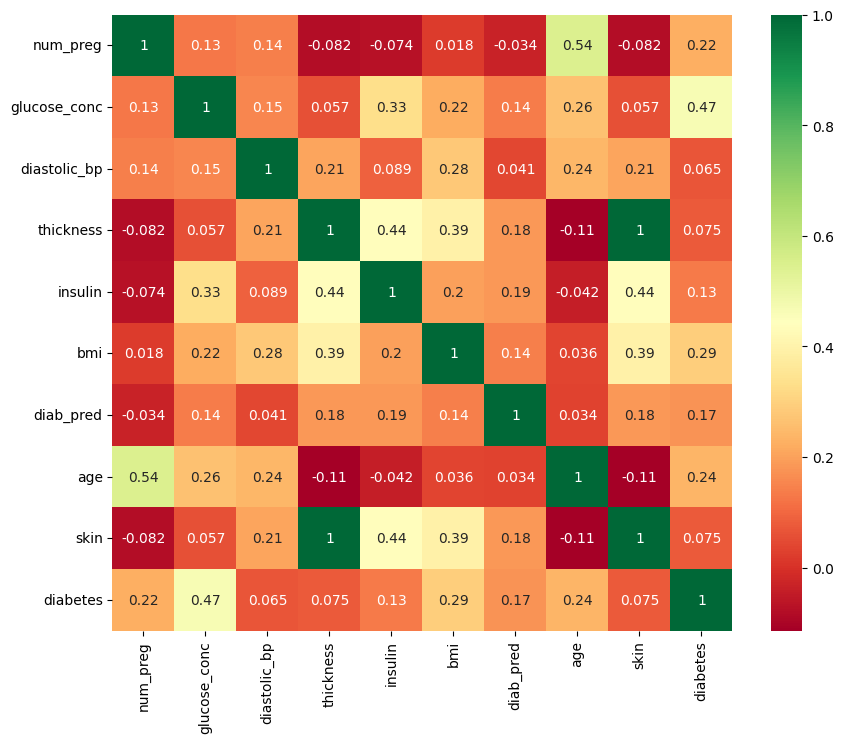

In [30]:
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [31]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [32]:
diabetes_map = {True: 1, False: 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)
data.head(2)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0


In [33]:
data.groupby("diabetes")['diabetes'].value_counts()

diabetes
0    500
1    268
Name: count, dtype: int64

In [34]:
data.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [35]:
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin']
target_column = ['diabetes']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[feature_columns].values, data[target_column].values, test_size=0.2, random_state=0)

In [38]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [39]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(x_train)
X_test = fill_values.fit_transform(x_test)

In [40]:
X_train

array([[7.00000000e+00, 1.50000000e+02, 7.80000000e+01, ...,
        6.92000000e-01, 5.40000000e+01, 1.14260000e+00],
       [4.00000000e+00, 9.70000000e+01, 6.00000000e+01, ...,
        4.43000000e-01, 2.20000000e+01, 9.06200000e-01],
       [4.58381503e+00, 1.65000000e+02, 9.00000000e+01, ...,
        4.27000000e-01, 2.30000000e+01, 1.30020000e+00],
       ...,
       [4.00000000e+00, 9.40000000e+01, 6.50000000e+01, ...,
        1.48000000e-01, 2.10000000e+01, 8.66800000e-01],
       [1.10000000e+01, 8.50000000e+01, 7.40000000e+01, ...,
        3.00000000e-01, 3.50000000e+01, 1.15491250e+00],
       [5.00000000e+00, 1.36000000e+02, 8.20000000e+01, ...,
        6.40000000e-01, 6.90000000e+01, 1.15491250e+00]])

In [41]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [42]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.799


In [43]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [45]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [46]:
classifier=xgboost.XGBClassifier()


In [47]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


In [48]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [50]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(data[feature_columns].values,data[target_column].values.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=0.819 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=0.763 total time=   0.2s
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=0.850 total time=   0.2s
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=0.804 total time=   0.2s
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=4, min_child_weight=1;, score=0.823 total time=   0.3s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.797 total time=   0.3s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=3;, score=0.782 total time=   0.3s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, m

In [51]:
random_search.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
classifier=xgboost.XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None)

In [55]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,data[feature_columns].values,data[target_column].values.ravel(),cv=10)

In [56]:
score

array([0.72727273, 0.77922078, 0.76623377, 0.68831169, 0.71428571,
       0.77922078, 0.79220779, 0.81818182, 0.71052632, 0.77631579])

In [57]:
score.mean()

0.7551777170198223